In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import datetime

import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import mean_squared_error

# Importing regression Modules
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Step 1:
Preprocess the data. Selection/generation/ transformation of categorical variables, useful variables etc all your discretion.

In [3]:
train = pd.read_csv('Data for Cleaning & Modeling.csv')

test = pd.read_csv('Holdout for Testing.csv')

In [4]:
train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  object 
 1   X2      399999 non-null  float64
 2   X3      399999 non-null  float64
 3   X4      399999 non-null  object 
 4   X5      399999 non-null  object 
 5   X6      399999 non-null  object 
 6   X7      399999 non-null  object 
 7   X8      338730 non-null  object 
 8   X9      338730 non-null  object 
 9   X10     376014 non-null  object 
 10  X11     382462 non-null  object 
 11  X12     338639 non-null  object 
 12  X13     338972 non-null  float64
 13  X14     399999 non-null  object 
 14  X15     399999 non-null  object 
 15  X16     123560 non-null  object 
 16  X17     399999 non-null  object 
 17  X18     399981 non-null  object 
 18  X19     399999 non-null  object 
 19  X20     399999 non-null  object 
 20  X21     399999 non-null  float64
 21  X22     39

### Missing values

In [6]:
train.shape

(400000, 32)

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
X2,399999.0,9.984493e+06,7.928778e+06,54734.0,3151742.50,8234778.0,15329598.50,28753146.00
X3,399999.0,1.133899e+07,8.663918e+06,70699.0,3727711.50,9667699.0,17312191.50,31278050.00
X13,338972.0,7.316015e+04,5.586770e+04,3000.0,45000.00,63000.0,88200.00,7500000.00
X21,399999.0,1.700079e+01,7.704189e+00,0.0,11.25,16.7,22.52,39.99
X22,399999.0,2.745282e-01,7.782095e-01,0.0,0.00,0.0,0.00,29.00
X24,399999.0,8.171545e-01,1.058746e+00,0.0,0.00,0.0,1.00,8.00
X25,181198.0,3.431212e+01,2.178731e+01,0.0,16.00,31.0,50.00,188.00
X26,51155.0,7.632040e+01,2.980451e+01,0.0,54.00,80.0,103.00,129.00
X27,399999.0,1.111795e+01,4.898569e+00,0.0,8.00,10.0,14.00,76.00
X28,399999.0,1.522854e-01,4.973886e-01,0.0,0.00,0.0,0.00,63.00


In [8]:
(train.isna().sum() / train.shape[0]).sort_values(ascending=False)

X26    0.872112
X16    0.691100
X25    0.547005
X12    0.153402
X8     0.153175
X9     0.153175
X13    0.152570
X1     0.152525
X10    0.059965
X11    0.043845
X30    0.000668
X18    0.000048
X21    0.000003
X27    0.000003
X28    0.000003
X29    0.000003
X31    0.000003
X24    0.000003
X23    0.000003
X22    0.000003
X17    0.000003
X20    0.000003
X19    0.000003
X2     0.000003
X15    0.000003
X14    0.000003
X7     0.000003
X6     0.000003
X5     0.000003
X4     0.000003
X3     0.000003
X32    0.000003
dtype: float64

- **X1** is target, drop rows in the train dataset without X1 first
- **X16** is Reason for loan provided by borrower, missing over 69%, impossible to fill and litte value for prediction, drop this columns
- **X26** is the number of months since borrower's last public record
- **X25** is the number of months since last delinquency. These three variables are missing over half of their values in train dataset and also in test set. According to [this book](http://www.statisticalassociates.com/missingvaluesanalysis_p.pdf), imputation is not applicable when over 50% of data is missing, so we dropped these three columns

In [9]:
train.dropna(subset=['X1'], inplace=True)
train.drop(columns=['X26', 'X16', 'X25'], inplace=True)
test.drop(columns=['X26', 'X16', 'X25'], inplace=True)

In [10]:
(train.isna().sum() / train.shape[0]).sort_values(ascending=False)

X12    0.153279
X8     0.153005
X9     0.153005
X13    0.152665
X10    0.059757
X11    0.043644
X30    0.000664
X18    0.000050
X22    0.000003
X23    0.000003
X24    0.000003
X15    0.000003
X20    0.000003
X27    0.000003
X28    0.000003
X29    0.000003
X31    0.000003
X21    0.000003
X32    0.000003
X19    0.000003
X17    0.000003
X2     0.000003
X14    0.000003
X7     0.000003
X6     0.000003
X5     0.000003
X4     0.000003
X3     0.000003
X1     0.000000
dtype: float64

In [11]:
(test.isna().sum() / test.shape[0]).sort_values(ascending=False)

X1     1.000000
X10    0.054925
X11    0.054775
X30    0.000375
X18    0.000000
X31    0.000000
X29    0.000000
X28    0.000000
X27    0.000000
X24    0.000000
X23    0.000000
X22    0.000000
X21    0.000000
X20    0.000000
X19    0.000000
X15    0.000000
X17    0.000000
X2     0.000000
X14    0.000000
X13    0.000000
X12    0.000000
X9     0.000000
X8     0.000000
X7     0.000000
X6     0.000000
X5     0.000000
X4     0.000000
X3     0.000000
X32    0.000000
dtype: float64

Notice **X10, X11, X30** have missing values in test dataset, so we need to fill the missing values in these cols or don't use them as predictors. As for other columns, we can drop rows with missing values where missing rate is under 5%.

In [12]:
train.dropna(subset=['X18', 'X22', 'X23', 'X24', 'X15', 'X20', 'X27', 'X28', 'X29', 'X31', 
                     'X21', 'X32', 'X19', 'X17', 'X2', 'X14', 'X7', 'X6', 'X5', 'X4', 'X3'], inplace=True)

In [13]:
(train.isna().sum() / train.shape[0]).sort_values(ascending=False)

X12    0.153278
X9     0.152997
X8     0.152997
X13    0.152670
X10    0.059751
X11    0.043641
X30    0.000661
X22    0.000000
X23    0.000000
X24    0.000000
X1     0.000000
X20    0.000000
X27    0.000000
X28    0.000000
X29    0.000000
X31    0.000000
X21    0.000000
X15    0.000000
X19    0.000000
X18    0.000000
X17    0.000000
X2     0.000000
X14    0.000000
X7     0.000000
X6     0.000000
X5     0.000000
X4     0.000000
X3     0.000000
X32    0.000000
dtype: float64

#### X13

<AxesSubplot:xlabel='X13', ylabel='Density'>

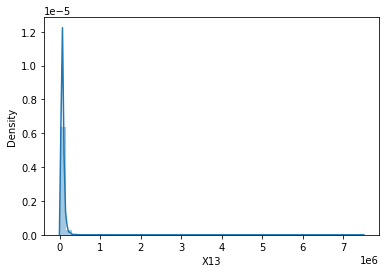

In [14]:
sns.distplot(train['X13'])

fill na in **X13** with median value

In [15]:
train['X13'].fillna(train['X13'].median(), inplace=True)

In [16]:
train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X21,X22,X23,X24,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,19.48,0.0,Feb-94,0.0,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,14.29,0.0,Oct-00,0.0,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,10.50,0.0,Jun-00,0.0,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,5.47,0.0,Jan-85,0.0,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,11.63,0.0,Dec-96,1.0,14.0,0.0,3511.0,25.60%,40.0,f


In [17]:
# remove dollar sign in X4, X5, X6
def remove_dollar_percentage(data):
    data['X4'] = [int(str(x).replace('$', '').replace(',', '')) for x in data['X4']]
    data['X5'] = [int(str(x).replace('$', '').replace(',', '')) for x in data['X5']]
    data['X6'] = [int(str(x).replace('$', '').replace(',', '')) for x in data['X6']]
    
    data.loc[data['X30'].notnull(),'X30'] = [x.replace('%', '') for x in data[data['X30'].notnull()].X30]
    data['X30'] = pd.to_numeric(data['X30'], errors='coerce')
    return data

In [18]:
train = remove_dollar_percentage(train)
test = remove_dollar_percentage(test)

#### X10: employer or job-title

In [19]:
train['X10'].value_counts()

Teacher                              3602
Manager                              2875
Registered Nurse                     1537
RN                                   1452
Supervisor                           1286
                                     ... 
HIlton Fort Worth                       1
Imperial Structured Settlements         1
Rural Telephone                         1
J. C. Mattress                          1
Senior Creative Designer/Ad Sales       1
Name: X10, Length: 163388, dtype: int64

too much levels in this column, hard to extract information, drop this column

In [20]:
train.drop(columns = ['X10'], inplace=True)
test.drop(columns = ['X10'], inplace=True)


#### X18: Loan title, as provided by borrower

In [21]:
train['X18'].value_counts()

Debt consolidation                     105698
Credit card refinancing                 40499
Debt Consolidation                      13275
Home improvement                         9888
Other                                    8188
                                        ...  
classy beginning                            1
Wedding and Bill Consolidation Loan         1
four2one3years                              1
thanks, household gods!                     1
Credit CardConsolidation                    1
Name: X18, Length: 53617, dtype: int64

In [22]:
train.drop(columns = ['X18'], inplace=True)
test.drop(columns = ['X18'], inplace=True)

#### X19: First 3 numbers of zip code

In [23]:
# clustering based on X4, X5, X6
train['X19'].value_counts()

945xx    3922
750xx    3703
112xx    3689
606xx    3419
100xx    3216
         ... 
643xx       1
528xx       1
522xx       1
663xx       1
938xx       1
Name: X19, Length: 874, dtype: int64

In [24]:
train.drop(columns = ['X19'], inplace=True)
test.drop(columns = ['X19'], inplace=True)

#### X12: home status

In [25]:
train['X12'].value_counts()

MORTGAGE    145953
RENT        115951
OWN          24974
OTHER          107
NONE            30
ANY              1
Name: X12, dtype: int64

In [26]:
# combine class "OTHER", "NONE", "ANY"
train.loc[[x in ["NONE", "ANY"] for x in train.X12], 'X12'] = "OTHER"

In [27]:
train['X12'].value_counts()

MORTGAGE    145953
RENT        115951
OWN          24974
OTHER          138
Name: X12, dtype: int64

In [28]:
train['X12'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', nan], dtype=object)

complete cases with MORTGAGE

In [29]:
train['X12'].fillna('MORTGAGE', inplace=True)

#### X11: the number of years employed

In [30]:
train['X11'].unique()

array(['< 1 year', '1 year', '10+ years', '6 years', '9 years', '3 years',
       '5 years', '2 years', '4 years', '8 years', '7 years', nan],
      dtype=object)

complete cases with 10+ years

In [31]:
train['X11'].fillna('10+ years', inplace=True)
test['X11'].fillna('10+ years', inplace=True)

In [32]:
train.isna().sum()

X1         0
X2         0
X3         0
X4         0
X5         0
X6         0
X7         0
X8     51862
X9     51862
X11        0
X12        0
X13        0
X14        0
X15        0
X17        0
X20        0
X21        0
X22        0
X23        0
X24        0
X27        0
X28        0
X29        0
X30      224
X31        0
X32        0
dtype: int64

#### X8, X9: loan grade and subgrade

In [33]:
train['X8'].value_counts()

B    86116
C    76444
D    46982
A    45524
E    21627
F     8394
G     2024
Name: X8, dtype: int64

In [34]:
train['X9'].unique()

array(['B4', 'B5', 'D3', 'C2', 'C3', 'D4', 'B3', 'C5', 'A5', 'D2', 'B1',
       'C4', 'A4', 'A3', 'C1', 'E4', 'B2', 'A2', 'E2', 'E1', 'D1', 'F1',
       'F2', 'A1', 'F3', 'E5', 'D5', nan, 'E3', 'F4', 'G5', 'F5', 'G1',
       'G4', 'G3', 'G2'], dtype=object)

drop X9, fill missing value in X8 WITH B

In [35]:
train.drop(columns = ['X9'], inplace=True)
test.drop(columns = ['X9'], inplace=True)
train['X8'].fillna('B', inplace=True)

#### X30: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

<AxesSubplot:xlabel='X30', ylabel='Density'>

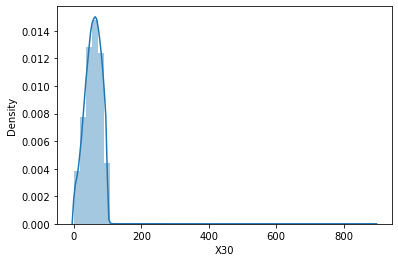

In [36]:
sns.distplot(train[train['X30'].notnull()]['X30'])

In [37]:
# fill with median
train['X30'].fillna(train['X30'].median(), inplace=True)
test['X30'].fillna(train['X30'].median(), inplace=True)

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338973 entries, 0 to 399999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338973 non-null  object 
 1   X2      338973 non-null  float64
 2   X3      338973 non-null  float64
 3   X4      338973 non-null  int64  
 4   X5      338973 non-null  int64  
 5   X6      338973 non-null  int64  
 6   X7      338973 non-null  object 
 7   X8      338973 non-null  object 
 8   X11     338973 non-null  object 
 9   X12     338973 non-null  object 
 10  X13     338973 non-null  float64
 11  X14     338973 non-null  object 
 12  X15     338973 non-null  object 
 13  X17     338973 non-null  object 
 14  X20     338973 non-null  object 
 15  X21     338973 non-null  float64
 16  X22     338973 non-null  float64
 17  X23     338973 non-null  object 
 18  X24     338973 non-null  float64
 19  X27     338973 non-null  float64
 20  X28     338973 non-null  float64
 21  X29     33

### Data Manipulation

#### Categorical vars

In [39]:
train['X17'].value_counts()

debt_consolidation    198218
credit_card            75679
home_improvement       19625
other                  17152
major_purchase          7311
small_business          5357
car                     4115
medical                 3329
moving                  2138
wedding                 1934
vacation                1848
house                   1723
educational              277
renewable_energy         267
Name: X17, dtype: int64

find the correlation between X17 and X1 to decide how to deal with this column

In [40]:
train.loc[train['X1'].notnull(),'X1'] = [x.replace('%', '') for x in train[train['X30'].notnull()].X1]
train['X1'] = pd.to_numeric(train['X1'], errors='coerce')
train

,X1,X2,X3,X4,X5,X6,X7,X8,X11,X12,...,X21,X22,X23,X24,X27,X28,X29,X30,X31,X32
0,11.89,54734.0,80364.0,25000,25000,19080,36 months,B,< 1 year,RENT,...,19.48,0.0,Feb-94,0.0,10.0,0.0,28854.0,52.1,42.0,f
1,10.71,55742.0,114426.0,7000,7000,673,36 months,B,< 1 year,RENT,...,14.29,0.0,Oct-00,0.0,7.0,0.0,33623.0,76.7,7.0,f
2,16.99,57167.0,137225.0,25000,25000,24725,36 months,D,1 year,RENT,...,10.50,0.0,Jun-00,0.0,10.0,0.0,19878.0,66.3,17.0,f
3,13.11,57245.0,138150.0,1200,1200,1200,36 months,C,10+ years,OWN,...,5.47,0.0,Jan-85,0.0,5.0,0.0,2584.0,40.4,31.0,f
4,13.57,57416.0,139635.0,10800,10800,10692,36 months,C,6 years,RENT,...,11.63,0.0,Dec-96,1.0,14.0,0.0,3511.0,25.6,40.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,12.99,28753086.0,31226222.0,10000,10000,10000,60 months,C,8 years,RENT,...,21.51,0.0,Nov-03,0.0,9.0,0.0,10268.0,76.1,20.0,w
399996,16.29,28753097.0,31226234.0,13150,13150,13150,36 months,D,1 year,OWN,...,29.76,0.0,Oct-07,0.0,11.0,0.0,8931.0,37.8,21.0,f
399997,10.99,28753099.0,31226236.0,20000,20000,20000,60 months,B,1 year,MORTGAGE,...,24.13,0.0,Oct-04,0.0,14.0,0.0,28976.0,69.3,48.0,w
399998,17.57,28753118.0,31226256.0,18475,18475,18475,60 months,D,10+ years,OWN,...,31.43,0.0,Mar-94,0.0,19.0,0.0,11982.0,39.0,31.0,f


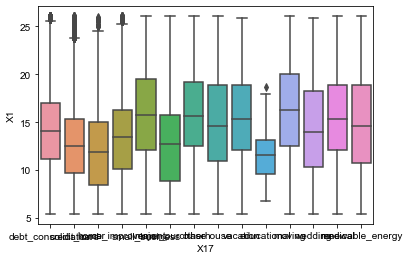

In [41]:
sns.boxplot(x="X17", y="X1",  data=train)
sns.set(rc = {'figure.figsize':(15,8)})

In [42]:
train.X17.value_counts()

debt_consolidation    198218
credit_card            75679
home_improvement       19625
other                  17152
major_purchase          7311
small_business          5357
car                     4115
medical                 3329
moving                  2138
wedding                 1934
vacation                1848
house                   1723
educational              277
renewable_energy         267
Name: X17, dtype: int64

In [43]:
train['X17'].unique()

array(['debt_consolidation', 'credit_card', 'car', 'home_improvement',
       'small_business', 'major_purchase', 'other', 'house', 'vacation',
       'educational', 'moving', 'wedding', 'medical', 'renewable_energy'],
      dtype=object)

education is obviously different from others.but only 277 lines in train dataset, So drop this columns

In [44]:
train.drop(columns = ['X17'], inplace=True)
test.drop(columns = ['X17'], inplace=True)

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338973 entries, 0 to 399999
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338973 non-null  float64
 1   X2      338973 non-null  float64
 2   X3      338973 non-null  float64
 3   X4      338973 non-null  int64  
 4   X5      338973 non-null  int64  
 5   X6      338973 non-null  int64  
 6   X7      338973 non-null  object 
 7   X8      338973 non-null  object 
 8   X11     338973 non-null  object 
 9   X12     338973 non-null  object 
 10  X13     338973 non-null  float64
 11  X14     338973 non-null  object 
 12  X15     338973 non-null  object 
 13  X20     338973 non-null  object 
 14  X21     338973 non-null  float64
 15  X22     338973 non-null  float64
 16  X23     338973 non-null  object 
 17  X24     338973 non-null  float64
 18  X27     338973 non-null  float64
 19  X28     338973 non-null  float64
 20  X29     338973 non-null  float64
 21  X30     33

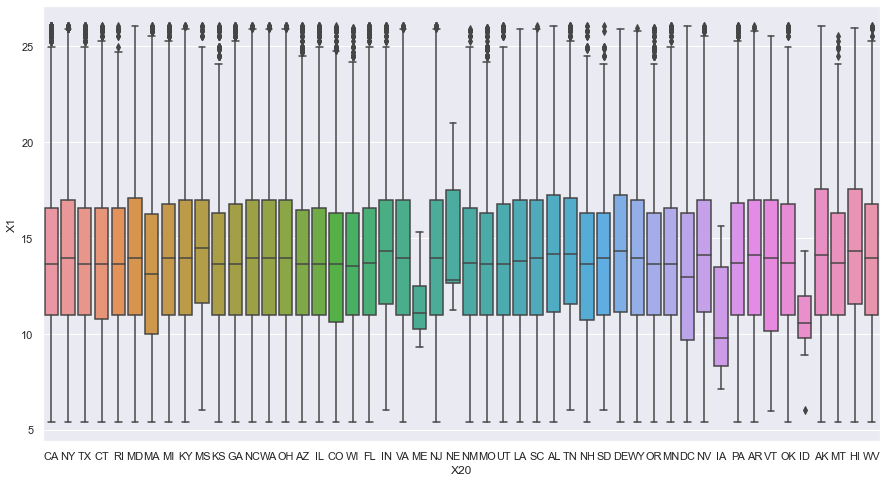

In [46]:
sns.boxplot(x="X20", y="X1", data=train)
sns.set(rc = {'figure.figsize':(15,8)})

In [47]:
train['X20'].value_counts()

CA    52833
NY    29224
TX    26492
FL    22754
IL    13483
NJ    13188
PA    11877
OH    11038
GA    10851
VA    10338
NC     9303
MI     8350
MA     8038
MD     8016
AZ     7746
WA     7706
CO     7118
MN     5864
MO     5397
CT     5242
NV     4753
IN     4608
OR     4411
WI     4245
TN     4215
AL     4188
LA     4017
SC     3979
KY     3172
KS     3096
OK     3013
AR     2532
UT     2531
NM     1848
HI     1798
WV     1738
NH     1648
RI     1486
DC     1080
MT      995
AK      947
DE      896
WY      853
SD      730
MS      707
VT      604
ID        8
IA        7
NE        6
ME        4
Name: X20, dtype: int64

The performance of state ME, IA, ID is different from others, but only have 4, 6, 7 rows respectively. So drop this column

In [48]:
train.drop(columns=['X20'], inplace=True)
test.drop(columns=['X20'], inplace=True)

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338973 entries, 0 to 399999
Data columns (total 23 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338973 non-null  float64
 1   X2      338973 non-null  float64
 2   X3      338973 non-null  float64
 3   X4      338973 non-null  int64  
 4   X5      338973 non-null  int64  
 5   X6      338973 non-null  int64  
 6   X7      338973 non-null  object 
 7   X8      338973 non-null  object 
 8   X11     338973 non-null  object 
 9   X12     338973 non-null  object 
 10  X13     338973 non-null  float64
 11  X14     338973 non-null  object 
 12  X15     338973 non-null  object 
 13  X21     338973 non-null  float64
 14  X22     338973 non-null  float64
 15  X23     338973 non-null  object 
 16  X24     338973 non-null  float64
 17  X27     338973 non-null  float64
 18  X28     338973 non-null  float64
 19  X29     338973 non-null  float64
 20  X30     338973 non-null  float64
 21  X31     33

In [50]:
cat_list = ['X7','X8', 'X11', 'X12', 'X14', 'X32']
train[cat_list] = train[cat_list].astype('category')
test[cat_list] = test[cat_list].astype('category')

#### date: x15, X23

- format "Aug-68" means 1968 Aug
- format "2-Aug" means 2002 Aug

In [51]:
def extract_month_year(data):
    data['year1'] = ""
    data['month1'] = ""
    data['year'] = ""
    data['month'] = ""
    # format Aug-68
    filter_1 = [x.isnumeric() and int(x) > 12 for x in np.array([x.split('-') for x in data['X15']])[:,1]] 
    data['year'][filter_1] = ['19' + x[-2:] for x in data[filter_1]['X15']]
    data['month'][filter_1] = [x[:3] for x in data[filter_1]['X15']]
    
    filter_1 = [x.isnumeric() and int(x) > 12 for x in np.array([x.split('-') for x in data['X23']])[:,1]] 
    data['year1'][filter_1] = ['19' + x[-2:] for x in data[filter_1]['X23']]
    data['month1'][filter_1] = [x[:3] for x in data[filter_1]['X23']]
    
    # format Aug-11
    filter_2 = [x.isnumeric() and int(x) <= 12 for x in np.array([x.split('-') for x in data['X15']])[:,1]]
    data['year'][filter_2] = ['20' + x[-2:] for x in data[filter_2]['X15']]
    data['month'][filter_2] = [x[:3] for x in data[filter_2]['X15']]
    
    filter_2 = [x.isnumeric() and int(x) <= 12 for x in np.array([x.split('-') for x in data['X23']])[:,1]]
    data['year1'][filter_2] = ['20' + x[-2:] for x in data[filter_2]['X23']]
    data['month1'][filter_2] = [x[:3] for x in data[filter_2]['X23']]
    
    # format 11-Aug
    filter_3 = [x.isnumeric() and len(x) == 2 for x in np.array([x.split('-') for x in data['X15']])[:,0]]
    data['year'][filter_3] = ['20' + x[:2] for x in data[filter_3]['X15']]
    data['month'][filter_3] = [x[-3:] for x in data[filter_3]['X15']]
    
    filter_3 = [x.isnumeric() and len(x) == 2 for x in np.array([x.split('-') for x in data['X23']])[:,0]]
    data['year1'][filter_3] = ['20' + x[:2] for x in data[filter_3]['X23']]
    data['month1'][filter_3] = [x[-3:] for x in data[filter_3]['X23']]
    
    # format 1-Aug
    filter_4 = [x.isnumeric() and len(x) == 1 for x in np.array([x.split('-') for x in data['X15']])[:,0]]
    data['year'][filter_4] = ['200' + x[0] for x in data[filter_4]['X15']]
    data['month'][filter_4] = [x[-3:] for x in data[filter_4]['X15']]
    
    filter_4 = [x.isnumeric() and len(x) == 1 for x in np.array([x.split('-') for x in data['X23']])[:,0]]
    data['year1'][filter_4] = ['200' + x[0] for x in data[filter_4]['X23']]
    data['month1'][filter_4] = [x[-3:] for x in data[filter_4]['X23']]
    
    return data

In [52]:
test = extract_month_year(test)
train = extract_month_year(train)

In [53]:
# drop X15 and X26
train.drop(columns=['X15', 'X23'], inplace=True)
test.drop(columns=['X15', 'X23'], inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338973 entries, 0 to 399999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   X1      338973 non-null  float64 
 1   X2      338973 non-null  float64 
 2   X3      338973 non-null  float64 
 3   X4      338973 non-null  int64   
 4   X5      338973 non-null  int64   
 5   X6      338973 non-null  int64   
 6   X7      338973 non-null  category
 7   X8      338973 non-null  category
 8   X11     338973 non-null  category
 9   X12     338973 non-null  category
 10  X13     338973 non-null  float64 
 11  X14     338973 non-null  category
 12  X21     338973 non-null  float64 
 13  X22     338973 non-null  float64 
 14  X24     338973 non-null  float64 
 15  X27     338973 non-null  float64 
 16  X28     338973 non-null  float64 
 17  X29     338973 non-null  float64 
 18  X30     338973 non-null  float64 
 19  X31     338973 non-null  float64 
 20  X32     338973 non-null  c

In [54]:
# drop ID
train.drop(columns=['X2', 'X3'], inplace=True)
test.drop(columns=['X2', 'X3'], inplace=True)

### Correlation analysis

#### y vs Numerical

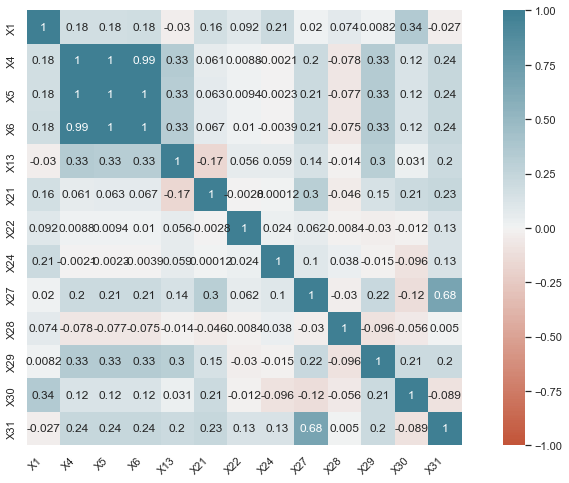

In [55]:
corr = train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

**Findings:**
- high correlation among X4, X5 and X6
- correlation between X27 and X31
- y is correlated with X4, X5, X6, X21, X24, X30

#### y vs Categorical

<AxesSubplot:xlabel='X7', ylabel='X1'>

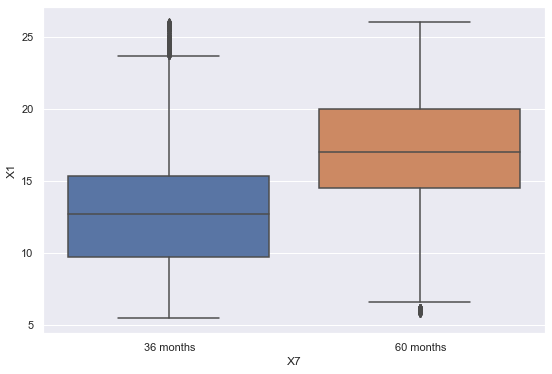

In [56]:
sns.set(rc = {'figure.figsize':(9,6)})
sns.boxplot(x="X7", y="X1", data=train)

<AxesSubplot:xlabel='X8', ylabel='X1'>

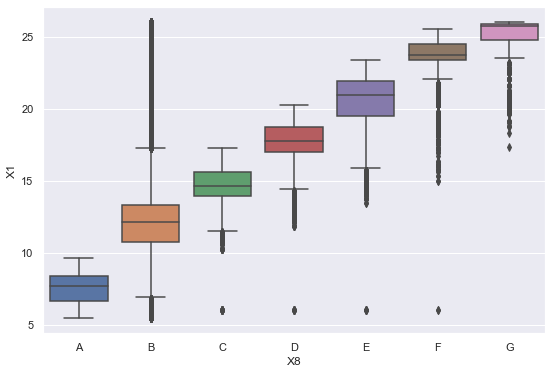

In [57]:
sns.set(rc = {'figure.figsize':(9,6)})
sns.boxplot(x="X8", y="X1", data=train)

<AxesSubplot:xlabel='X11', ylabel='X1'>

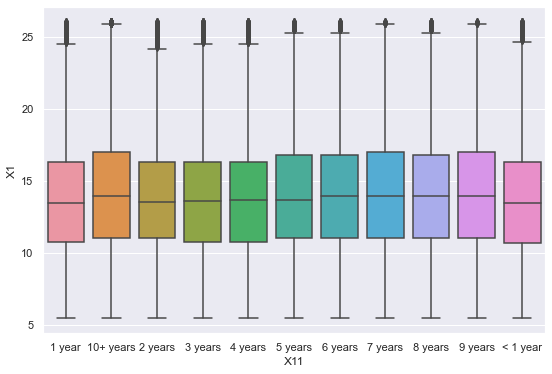

In [58]:
sns.set(rc = {'figure.figsize':(9,6)})
sns.boxplot(x="X11", y="X1", data=train)

<AxesSubplot:xlabel='X12', ylabel='X1'>

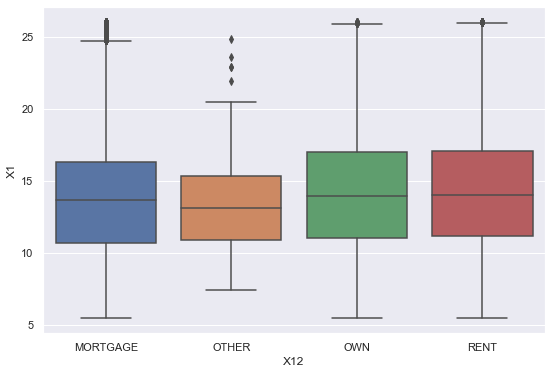

In [59]:
sns.set(rc = {'figure.figsize':(9,6)})
sns.boxplot(x="X12", y="X1", data=train)

<AxesSubplot:xlabel='X14', ylabel='X1'>

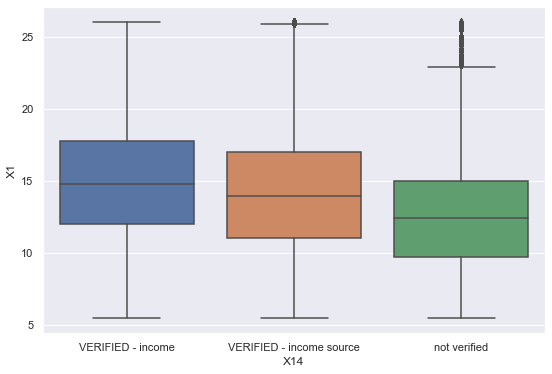

In [60]:
sns.set(rc = {'figure.figsize':(9,6)})
sns.boxplot(x="X14", y="X1", data=train)

<AxesSubplot:xlabel='X32', ylabel='X1'>

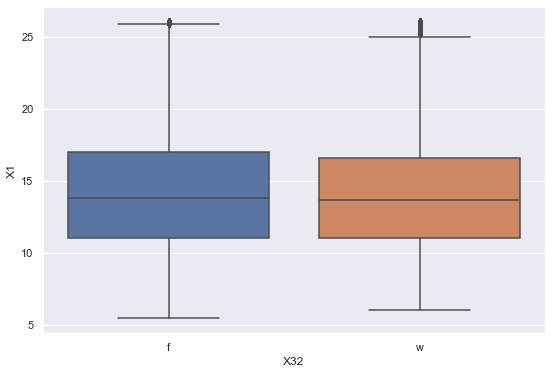

In [61]:
sns.set(rc = {'figure.figsize':(9,6)})
sns.boxplot(x="X32", y="X1", data=train)

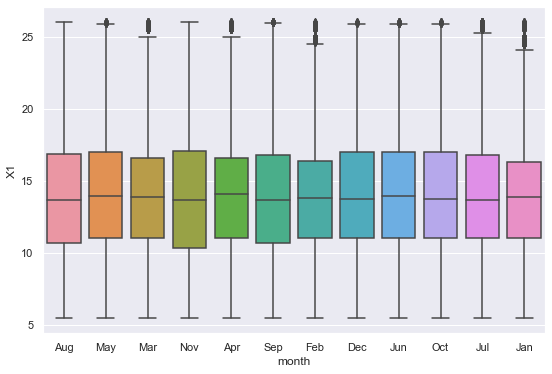

In [62]:
sns.boxplot(x="month", y="X1", data=train)
sns.set(rc = {'figure.figsize':(15,8)})

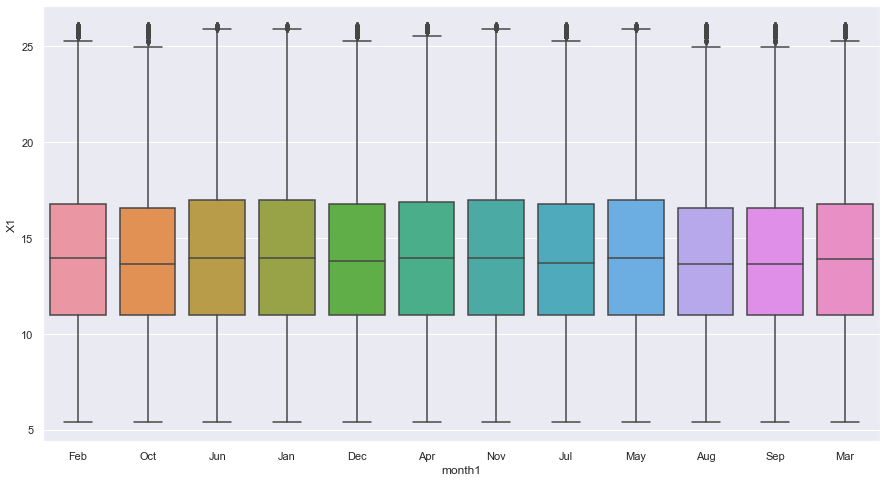

In [63]:
sns.boxplot(x="month1", y="X1", data=train)
sns.set(rc = {'figure.figsize':(15,8)})

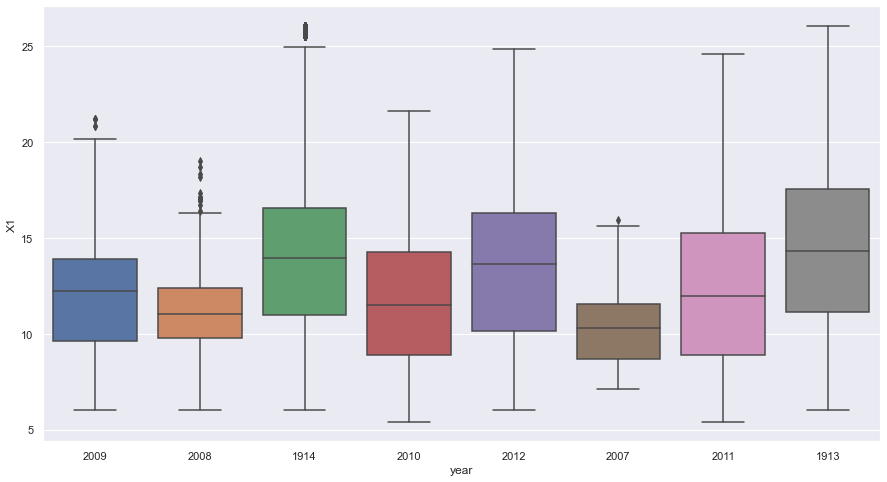

In [64]:
sns.boxplot(x="year", y="X1", data=train)
sns.set(rc = {'figure.figsize':(15,8)})

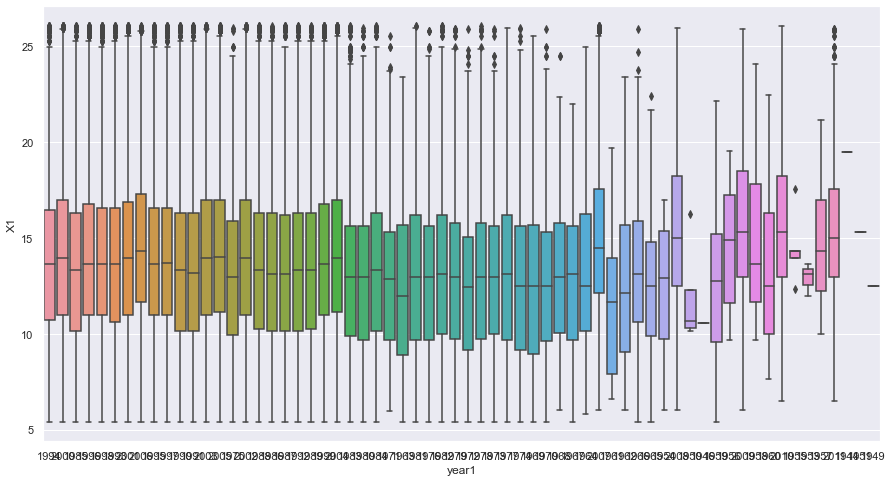

In [65]:
sns.boxplot(x="year1", y="X1", data=train)
sns.set(rc = {'figure.figsize':(15,8)})

**Findings:**
- Obvious relationship with y: X7, X8, X14, year
- trivial: X12, X32
- no relationship: month1, year1, month

In [66]:
# feature engineering
## average of X4, X5 and X6
## keep X21, X24, X30, X7, X8, X14, year, X12
train['average456'] = round(train[['X4', 'X5', 'X6']].mean(axis=1))
del_cols = ['X4', 'X5', 'X6', 'X13', 'X22', 'X27', 'X28', 'X29', 'X31', 'X11', 'X32', 'year1', 'month1', 'month', 'year']
train.drop(columns = del_cols, inplace=True)
train.head()

,X1,X7,X8,X12,X14,X21,X24,X30,average456
0,11.89,36 months,B,RENT,VERIFIED - income,19.48,0.0,52.1,23027.0
1,10.71,36 months,B,RENT,not verified,14.29,0.0,76.7,4891.0
2,16.99,36 months,D,RENT,VERIFIED - income,10.50,0.0,66.3,24908.0
3,13.11,36 months,C,OWN,not verified,5.47,0.0,40.4,1200.0
4,13.57,36 months,C,RENT,not verified,11.63,1.0,25.6,10764.0


In [67]:
test['average456'] = round(test[['X4', 'X5', 'X6']].mean(axis=1))
del_cols = ['X4', 'X5', 'X6', 'X13', 'X22', 'X27', 'X28', 'X29', 'X31', 'X11', 'X32', 'year1', 'month1', 'month', 'year']
test.drop(columns = del_cols, inplace=True)
test.head()

,X1,X7,X8,X12,X14,X21,X24,X30,average456
0,NaN,36 months,C,MORTGAGE,VERIFIED - income,28.31,1,64.5,6000.0
1,NaN,36 months,A,RENT,VERIFIED - income,16.03,1,26.2,24000.0
2,NaN,36 months,C,MORTGAGE,VERIFIED - income,32.49,0,49.9,35000.0
3,NaN,60 months,D,RENT,VERIFIED - income source,32.96,1,43.8,10000.0
4,NaN,60 months,B,MORTGAGE,VERIFIED - income,31.03,0,41.3,24000.0


### Encoding

#### Nominal

In [76]:
train['X12'].unique()

['RENT', 'OWN', 'MORTGAGE', 'OTHER']
Categories (4, object): ['MORTGAGE', 'OTHER', 'OWN', 'RENT']

In [77]:
test['X12'] = test['X12'].cat.add_categories('OTHER')

In [78]:
test['X12'].cat.reorder_categories(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], inplace=True)

In [81]:
dum_df = pd.get_dummies(train[['X12', 'X14']], drop_first=True)

train = pd.concat([train.drop(columns = ['X12', 'X14']), dum_df], axis=1)
train

,X1,X7,X8,X21,X24,X30,average456,X12_OTHER,X12_OWN,X12_RENT,X14_VERIFIED - income source,X14_not verified
0,11.89,36 months,B,19.48,0.0,52.1,23027.0,0,0,1,0,0
1,10.71,36 months,B,14.29,0.0,76.7,4891.0,0,0,1,0,1
2,16.99,36 months,D,10.50,0.0,66.3,24908.0,0,0,1,0,0
3,13.11,36 months,C,5.47,0.0,40.4,1200.0,0,1,0,0,1
4,13.57,36 months,C,11.63,1.0,25.6,10764.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
399995,12.99,60 months,C,21.51,0.0,76.1,10000.0,0,0,1,1,0
399996,16.29,36 months,D,29.76,0.0,37.8,13150.0,0,1,0,0,0
399997,10.99,60 months,B,24.13,0.0,69.3,20000.0,0,0,0,1,0
399998,17.57,60 months,D,31.43,0.0,39.0,18475.0,0,1,0,1,0


In [82]:
dum_df = pd.get_dummies(test[['X12', 'X14']], drop_first=True)

test = pd.concat([test.drop(columns = ['X12', 'X14']), dum_df], axis=1)
test

,X1,X7,X8,X21,X24,X30,average456,X12_OTHER,X12_OWN,X12_RENT,X14_VERIFIED - income source,X14_not verified
0,NaN,36 months,C,28.31,1,64.5,6000.0,0,0,0,0,0
1,NaN,36 months,A,16.03,1,26.2,24000.0,0,0,1,0,0
2,NaN,36 months,C,32.49,0,49.9,35000.0,0,0,0,0,0
3,NaN,60 months,D,32.96,1,43.8,10000.0,0,0,1,1,0
4,NaN,60 months,B,31.03,0,41.3,24000.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
79995,NaN,36 months,A,15.74,0,47.9,6400.0,0,0,0,0,1
79996,NaN,60 months,E,19.28,0,51.3,30000.0,0,0,0,0,0
79997,NaN,36 months,D,17.50,0,37.1,17600.0,0,0,0,0,1
79998,NaN,36 months,C,16.52,0,76.7,2500.0,0,0,0,0,1


#### Ordinal

In [83]:
train.X7.unique()

[' 36 months', ' 60 months']
Categories (2, object): [' 36 months', ' 60 months']

In [84]:
# remove space
train.X7 = [x.strip() for x in train.X7]
train.X7.unique()
test.X7 = [x.strip() for x in test.X7]

In [85]:
map_dict = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5,'G':6}
train.X8 = [map_dict[x] for x in train.X8]
train.X7 = [int(x == '60 months') for x in train.X7]
test.X8 = [map_dict[x] for x in test.X8]
test.X7 = [int(x == '60 months') for x in test.X7]

In [86]:
train = train[['X1', 'X21', 'X24', 'X30','average456', 'X7', 'X8', 'X12_OTHER', 'X12_OWN','X12_RENT','X14_VERIFIED - income source','X14_not verified']]
test = test[['X1', 'X21', 'X24', 'X30','average456', 'X7', 'X8', 'X12_OTHER', 'X12_OWN','X12_RENT','X14_VERIFIED - income source','X14_not verified']]
train

,X1,X21,X24,X30,average456,X7,X8,X12_OTHER,X12_OWN,X12_RENT,X14_VERIFIED - income source,X14_not verified
0,11.89,19.48,0.0,52.1,23027.0,0,1,0,0,1,0,0
1,10.71,14.29,0.0,76.7,4891.0,0,1,0,0,1,0,1
2,16.99,10.50,0.0,66.3,24908.0,0,3,0,0,1,0,0
3,13.11,5.47,0.0,40.4,1200.0,0,2,0,1,0,0,1
4,13.57,11.63,1.0,25.6,10764.0,0,2,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
399995,12.99,21.51,0.0,76.1,10000.0,1,2,0,0,1,1,0
399996,16.29,29.76,0.0,37.8,13150.0,0,3,0,1,0,0,0
399997,10.99,24.13,0.0,69.3,20000.0,1,1,0,0,0,1,0
399998,17.57,31.43,0.0,39.0,18475.0,1,3,0,1,0,1,0


In [87]:
test

,X1,X21,X24,X30,average456,X7,X8,X12_OTHER,X12_OWN,X12_RENT,X14_VERIFIED - income source,X14_not verified
0,NaN,28.31,1,64.5,6000.0,0,2,0,0,0,0,0
1,NaN,16.03,1,26.2,24000.0,0,0,0,0,1,0,0
2,NaN,32.49,0,49.9,35000.0,0,2,0,0,0,0,0
3,NaN,32.96,1,43.8,10000.0,1,3,0,0,1,1,0
4,NaN,31.03,0,41.3,24000.0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
79995,NaN,15.74,0,47.9,6400.0,0,0,0,0,0,0,1
79996,NaN,19.28,0,51.3,30000.0,1,4,0,0,0,0,0
79997,NaN,17.50,0,37.1,17600.0,0,3,0,0,0,0,1
79998,NaN,16.52,0,76.7,2500.0,0,2,0,0,0,0,1


## Step 2:
Build your models: Please build machine learning/statistical models in Python to predict the interest rate assigned to a loan. When writing the code associated with each model, please have the first part produce and save the model, followed by a second part that loads and applies the model.

### Compare baseline

In [88]:
X = train.iloc[:,1:].values
y = train['X1'].values

# train valid split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train

array([[ 5.98,  0.  , 18.4 , ...,  0.  ,  0.  ,  1.  ],
       [16.3 ,  0.  , 32.8 , ...,  0.  ,  0.  ,  1.  ],
       [17.51,  1.  , 52.5 , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [11.53,  0.  , 75.  , ...,  0.  ,  0.  ,  1.  ],
       [ 6.71,  0.  , 10.2 , ...,  1.  ,  0.  ,  0.  ],
       [15.23,  0.  , 78.6 , ...,  1.  ,  0.  ,  0.  ]])

In [89]:
# StandardScaler on numerical values
scaler = StandardScaler()
X_scaled_train = np.concatenate((scaler.fit_transform(X_train[:,:4]),X_train[:, 4:]), axis=1)
X_scaled_valid = np.concatenate((scaler.transform(X_valid[:, :4]),X_valid[:, 4:]), axis=1)

In [76]:
# modeling
# get a list of models to evaluate
def get_models():
    models = dict()
    models['LinearReg'] = LinearRegression()
    models['RandomForest'] = RandomForestRegressor()
    models['xgb'] = xgb.XGBRegressor(verbosity=0) 
    return models

In [85]:
models = get_models()
results, names = list(), list()

for name,model in models.items():
    model.fit(X_scaled_train, y_train)
    y_pred = model.predict(X_scaled_valid)
    scores = mean_squared_error(y_valid, y_pred)
    results.append(scores)
    names.append(name)
    print('%s valid score %.3f ' % (name, np.mean(scores)))

LinearReg valid score 4.504 
RandomForest valid score 3.769 
xgb valid score 3.456 


### fine tune models

#### Random forest

In [90]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [80, 110],
    'max_features': [2,3],
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [92]:
grid_search.fit(X_scaled_train, y_train)
grid_search.best_params_

Fitting 2 folds for each of 4 candidates, totalling 8 fits


{'max_depth': 110, 'max_features': 3}

In [94]:
param_grid = {
    'max_depth': [150, 300],
    'max_features': [7,10],
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

grid_search.fit(X_scaled_train, y_train)
grid_search.best_params_

Fitting 2 folds for each of 4 candidates, totalling 8 fits


{'max_depth': 150, 'max_features': 7}

In [99]:
param_grid = {
    'max_depth': [150],
    'max_features': [7],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 300]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

grid_search.fit(X_scaled_train, y_train)
grid_search.best_params_

Fitting 2 folds for each of 8 candidates, totalling 16 fits


{'max_depth': 150,
 'max_features': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 300}

In [100]:
param_grid = {
    'max_depth': [150],
    'max_features': [7],
    'min_samples_leaf': [5, 7],
    'min_samples_split': [10, 13],
    'n_estimators': [300, 350]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

grid_search.fit(X_scaled_train, y_train)
grid_search.best_params_

Fitting 2 folds for each of 8 candidates, totalling 16 fits


{'max_depth': 150,
 'max_features': 7,
 'min_samples_leaf': 7,
 'min_samples_split': 10,
 'n_estimators': 300}

In [103]:
param_grid = {
    'max_depth': [150],
    'max_features': [7],
    'min_samples_leaf': [9,11],
    'min_samples_split': [10],
    'n_estimators': [300]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

grid_search.fit(X_scaled_train, y_train)
grid_search.best_params_

Fitting 2 folds for each of 2 candidates, totalling 4 fits


{'max_depth': 150,
 'max_features': 7,
 'min_samples_leaf': 11,
 'min_samples_split': 10,
 'n_estimators': 300}

In [104]:
param_grid = {
    'max_depth': [150],
    'max_features': [7],
    'min_samples_leaf': [11, 13],
    'min_samples_split': [10],
    'n_estimators': [300]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

grid_search.fit(X_scaled_train, y_train)
grid_search.best_params_

Fitting 2 folds for each of 2 candidates, totalling 4 fits


{'max_depth': 150,
 'max_features': 7,
 'min_samples_leaf': 13,
 'min_samples_split': 10,
 'n_estimators': 300}

In [105]:
rf = RandomForestRegressor(max_depth=150,max_features=7, min_samples_leaf=13, min_samples_split = 10, n_estimators=300 )
rf.fit(X_scaled_train, y_train)
y_pred = rf.predict(X_scaled_valid)
mean_squared_error(y_valid, y_pred)

3.5198616333662343

#### XGBoost

In [107]:
# Create the parameter grid
param_grid = {
    'learning_rate': [0.1],
    'gamma': [0], 
    'n_estimators':[500],
    'subsample': [0.6,0.8],
    'max_depth': [4, 6]
}
xgbr = xgb.XGBRegressor(verbosity=0) 
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgbr, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

grid_search.fit(X_scaled_train, y_train)
grid_search.best_params_

Fitting 2 folds for each of 4 candidates, totalling 8 fits


{'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 500,
 'subsample': 0.8}

In [108]:
# Create the parameter grid
param_grid = {
    'learning_rate': [0.1],
    'gamma': [0], 
    'n_estimators':[500],
    'subsample': [0.8,0.9],
    'max_depth': [6,8]
}
xgbr = xgb.XGBRegressor(verbosity=0) 
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgbr, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

grid_search.fit(X_scaled_train, y_train)
grid_search.best_params_

Fitting 2 folds for each of 4 candidates, totalling 8 fits


{'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 500,
 'subsample': 0.9}

In [109]:
# Create the parameter grid
param_grid = {
    'learning_rate': [0.1],
    'gamma': [0], 
    'n_estimators':[500],
    'subsample': [0.9],
    'max_depth': [5,6]
}
xgbr = xgb.XGBRegressor(verbosity=0) 
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgbr, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

grid_search.fit(X_scaled_train, y_train)
grid_search.best_params_

Fitting 2 folds for each of 2 candidates, totalling 4 fits


{'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 500,
 'subsample': 0.9}

In [110]:
# Create the parameter grid
param_grid = {
    'learning_rate': [0.1],
    'gamma': [i/10.0 for i in range(0,5)], 
    'n_estimators':[500],
    'subsample': [0.9],
    'max_depth': [5]
}
xgbr = xgb.XGBRegressor(verbosity=0) 
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgbr, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

grid_search.fit(X_scaled_train, y_train)
grid_search.best_params_

Fitting 2 folds for each of 5 candidates, totalling 10 fits


{'gamma': 0.4,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 500,
 'subsample': 0.9}

In [111]:
grid_search.best_score_

0.8191165004030045

In [112]:
# Create the parameter grid
param_grid = {
    'learning_rate': [0.01],
    'gamma': [0.4], 
    'n_estimators':[500],
    'subsample': [0.9],
    'max_depth': [5]
}
xgbr = xgb.XGBRegressor(verbosity=0) 
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgbr, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

grid_search.fit(X_scaled_train, y_train)
grid_search.best_params_

Fitting 2 folds for each of 1 candidates, totalling 2 fits


{'gamma': 0.4,
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 500,
 'subsample': 0.9}

In [113]:
grid_search.best_score_

0.8135518648575809

In [114]:
xgbr = xgb.XGBRegressor(verbosity=0,
    learning_rate = 0.1,
    gamma = 0.4, 
    n_estimators = 500,
    subsample = 0.9,
    max_depth = 5) 

xgbr.fit(X_scaled_train, y_train)
y_pred = xgbr.predict(X_scaled_valid)
mean_squared_error(y_valid, y_pred)

3.4257622159359364

## Step 3:
Test your models using the data found within the "Holdout for Testing" file. Save the results of the final model (remember you will only predict the first column in holdout test set with your best model results) in a single, separate CSV titled "Results from" *insert your name or UChicago net ID.

In [117]:
X_test = test.iloc[:,1:].values
X_test

array([[28.31,  1.  , 64.5 , ...,  0.  ,  0.  ,  0.  ],
       [16.03,  1.  , 26.2 , ...,  1.  ,  0.  ,  0.  ],
       [32.49,  0.  , 49.9 , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [17.5 ,  0.  , 37.1 , ...,  0.  ,  0.  ,  1.  ],
       [16.52,  0.  , 76.7 , ...,  0.  ,  0.  ,  1.  ],
       [ 9.6 ,  0.  , 93.7 , ...,  0.  ,  0.  ,  1.  ]])

In [118]:
# fit on whole dataset
scaler = StandardScaler()
X_scaled = np.concatenate((scaler.fit_transform(X[:,:4]),X[:, 4:]), axis=1)
X_scaled_test = np.concatenate((scaler.transform(X_test[:, :4]),X_test[:, 4:]), axis=1)

xgbr = xgb.XGBRegressor(verbosity=0,
    learning_rate = 0.1,
    gamma = 0.4, 
    n_estimators = 500,
    subsample = 0.9,
    max_depth = 5) 
xgbr.fit(X, y)

y_pred = xgbr.predict(X_scaled_test)

In [121]:
pd.DataFrame(y_pred, columns = ['X1']).to_csv('Results from Yingfan Duan.csv', index=False)

In [1]:
import pandas as pd

result = pd.read_csv('Results from Yingfan Duan.csv')

In [3]:
result['X1'] = [x * 0.01 for x in result.X1]
result

,X1
0,0.129046
1,0.080451
2,0.126796
3,0.161810
4,0.135635
...,...
79995,0.074508
79996,0.207127
79997,0.145855
79998,0.119623


In [4]:
result.to_csv('Results from Yingfan Duan.csv', index=False)

## Step 4
 a brief write-up comparing the pros and cons of the modeling techniques you used (no more than a paragraph).

I used three models: linear regression, random forest and xgboost. Linear regression can help us understand the relationship of dependent variable and predictors. But it can only capture linear relationship. Random forest is a method of bagging. It can prevent overfitting and easy to tune parameters while have good prediction result. But it can give more weights for categorical variables with more levels. Lastly, xgboost is a method of boosting. It can capture non-linear patterns in data and is fast because of its scalability and parallelization. But it does not perform so well on sparse and unstructured data, also sensitive to outliers.